<h1><center> Boston Housing Prices Prediction


This data frame contains the following columns:

**crim**: per capita crime rate by town.
**zn**: proportion of residential land zoned for lots over 25,000 sq.ft.
**indus**: proportion of non-retail business acres per town.
**chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
**nox**: nitrogen oxides concentration (parts per 10 million).
**rm**: average number of rooms per dwelling.
**age**: proportion of owner-occupied units built prior to 1940.
**dis**: weighted mean of distances to five Boston employment centres.
**rad**: index of accessibility to radial highways.
**tax**: full-value property-tax rate per 10,000.
**ptratio**: pupil-teacher ratio by town.
**black**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
**lstat**: lower status of the population (percent).
**medv**: median value of owner-occupied homes in $1000s.

## Problem Statement:
This is just a template

## Hypothesis:
1. Lower crime rates means safer neighbourhoods thus would mean higher housing prices as area will be more appealing. (**crim**)
2. The higher number of rooms per dwelling increases the housing value thus leads to higher prices. (**rm**)
3. Higer concentration nitrogen oxides are undesirable due to associate health problems therefore would lead to lower housing prices. (**nox**)
4. Lower pupil-teacher ratio will result in higher prices due to more personalize attention for student. (**ptratio**)
5. Blacks in the US live in lower valued communities so this would mean that prices would be lower. (**black**)
6. The more land zoned for residental purposes means would deem an increased home prices as agricultural lands are cheaply priced. (**crim**)
7. Living near a river is not desirable as urbanized areas do not have that rural feature thus decreasing the housing prices.(**chas**)
8. Higher taxes will lead to higher prices so as to compensation of taxes. (**tax**)
9. Accessibility to highway will increase the housing prices as it shows more urbanized infrastructure for all uses. (**rad**)
10. The closer the distance to place of employment will increase prices as it will make homes more appealing to buyers (**dis**)
11. Older homes are more run-down and less appealing to buyers as it may with lots of unlaying issues thus decrease home prices. (**age**)
12. Unsure of what Istat means or how to interpret this feature variable. (**Istat**)

In [2]:
#Libraries
import numpy as np 
import pandas as pd
import sklearn as sk
import seaborn as sb
%matplotlib inline 

## Data Acquisition

In [3]:
# importing the dataset
location = r"C:\Users\Latoya Clarke\Desktop\Data for Analysis\Bouston Housing Data\train.csv"
boston = pd.read_csv(location)
boston.head()


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


##  Data Exploration

### Variable Identification

1. Target Variable: **medv**
2. Predictor Variables: **crim, indus, nox, chas, rm, dis, rad, tax, ptratio**     

### Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.

Continuous Variables:- In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics visualization methods.

Categorical Variables:- For categorical variables, we’ll use frequency table to understand distribution of each category. We can also read as percentage of values under each category. It can be be measured using two metrics, Count and Count% against each category. Bar chart can be used as visualization.

In [4]:
#Taking a general look on the dataset
boston.info()

#No values missing, All fields are numeric fields
#number of entries is 333 with 15 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [5]:
boston.describe()

#most field have wide ranges 

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


### Bivariate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables.

In [6]:
# Seeing the values correlate with the predictor variables.
boston.corr()

# medv shows a relatively strong positive correlation to the rm and a moderately positive correlation to zn
# Also shows a negatively, moderately correlation to crim, indus, nox, tax, ptratio
# and shows a strong negative correlation to Istat 
# These variables will be used for the analysis: rm, Lstat, crim, zn, indus, nox, tax, ptratio

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


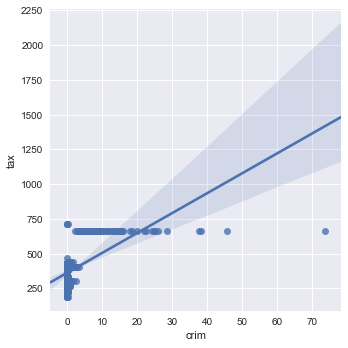

In [7]:
sb.set(color_codes=True)
sb.lmplot(x="crim", y="tax", data=boston)

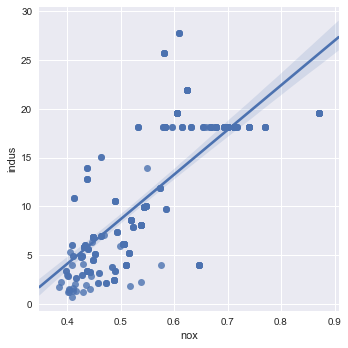

In [8]:
sb.lmplot(x="nox", y="indus", data=boston)

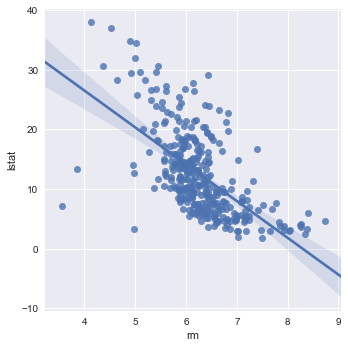

In [9]:
sb.lmplot(x="rm", y="lstat", data=boston)

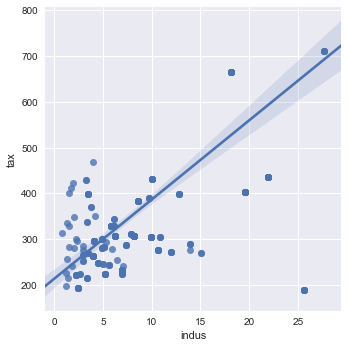

In [10]:
sb.lmplot(x="indus", y="tax", data=boston)

### Missing Value Treatment

Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.

### Outlier Detection and Treatment

Outlier can be of two types: Univariate and Multivariate. Above, we have discussed the example of univariate outlier. These outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space.
Outliers can drastically change the results of the data analysis and statistical modeling.
Most commonly used method to detect outliers is visualization. We use various visualization methods, like Box-plot, Histogram, Scatter Plots.

## Feature Engineering

Feature engineering is the science (and art) of extracting more information from existing data. You are actually making the data you already have more useful. Feature engineering itself can be divided in 2 steps:
Variable transformation and
Variable / Feature creation.

### Variable Transformation

In data modelling, transformation refers to the replacement of a variable by a function. In other words, transformation is a process that changes the distribution or relationship of a variable with others.

### Variable Creation

Feature / Variable creation is a process to generate a new variables / features based on existing variable(s).

## Model Building

This is making predictive models on the data

In [11]:
y = np.array(boston.medv)

boston_selected = boston.drop(['black','rad','medv','chas','ID','dis','age','ptratio'], axis = 1)
X= boston_selected.to_dict(orient='records')

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
X = vec.fit_transform(X).toarray()

In [12]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [13]:
#Visualize training/testing dataset

In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 20)

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9616260625706573

In [15]:
#Predict Output
predicted= model.predict(X_test)

#### Using the Root Mean Squared Error (RMSE) to test Accuracy of Regression Model

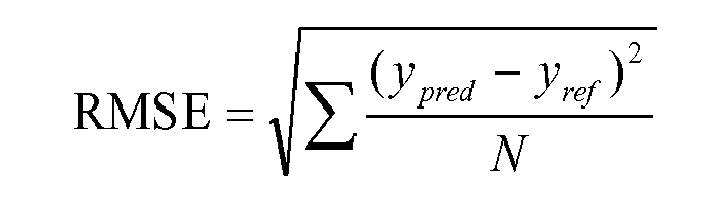

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, predicted))
rms

3.4666128248784776

##  Data Visualization

Create visualizations for presentation

<center>Shamar Morgan (B.Eng)<center>
<center>Electrical Engineering<center>
<center>*Data Scientist*<center>